In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt #graafik çizme - charts
%matplotlib inline 
import numpy as np #sahte veri üretmemizi sağlar,MATEMATİK,VECTÖRLER,TÜREV,İNTREGRAL,DİFERANSİYEL DENKLEMLER,İSTATİSTİK


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('food_order.csv')

In [5]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [6]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [7]:
df.sample(4)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1623,1477905,164626,The Meatball Shop,Italian,15.57,Weekend,4,20,24
57,1477889,177250,RedFarm Hudson,Chinese,12.23,Weekday,5,25,33
26,1476995,371590,The Meatball Shop,Italian,21.88,Weekday,5,24,27
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23


In [8]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [9]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [11]:
df.corr()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


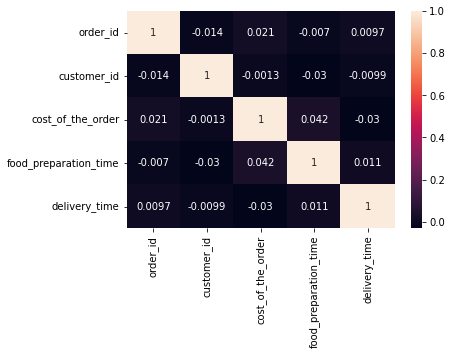

In [12]:
sns.heatmap(df.corr(),annot=True);#annot=True = grafiğin içindeki korelasyon kutucuklarına korelasyon değerlerini yazdırır
#korelasyon %100 çıkarsa veri farklı şekilde kendini tekrar etmiş olur.

In [13]:
df.shape

(1898, 9)

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [15]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


The Minimum food preperation time = 20.00 mins

The Average food preperation time = 27.37 mins

The Maximum food preperation time = 35.00 mins

In [16]:
df.sample()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
743,1478178,125834,The Meatball Shop,Italian,12.23,Weekend,5,25,19


In [17]:
df['restaurant_name'] = df['restaurant_name'].apply(lambda x : x.strip().capitalize())


In [18]:
df.sample()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
236,1476753,195723,Cafe habana,Mexican,13.97,Weekday,3,34,28


In [ ]:
df['restaurant_name'].unique()

In [20]:
df['restaurant_name'].nunique()

178

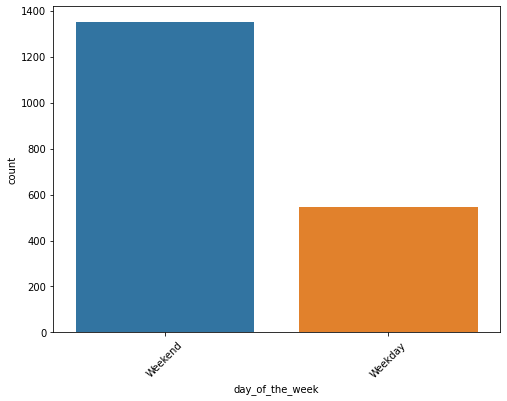

In [21]:
plt.figure(figsize=(8,6)) #grafiğin boyutunu ayarlar
sns.countplot(df['day_of_the_week']); #hangi aylarda satış yapılmış gösterir
#countplot=sayıları sayar sonucu gösterir
plt.xticks(rotation=45); #altta ki yazıları 45 derece ile yazmak için

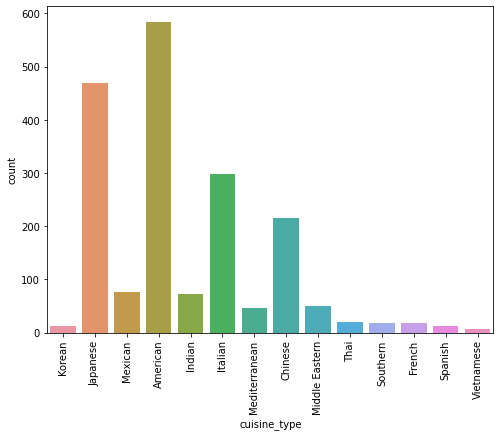

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(df["cuisine_type"]);
#countplot= bir sütundaki farklı verileri say onları ayrı ayrı topla ve grafiğini çıkar
plt.xticks(rotation=90);

Text(0.5, 1.0, 'restaurants')

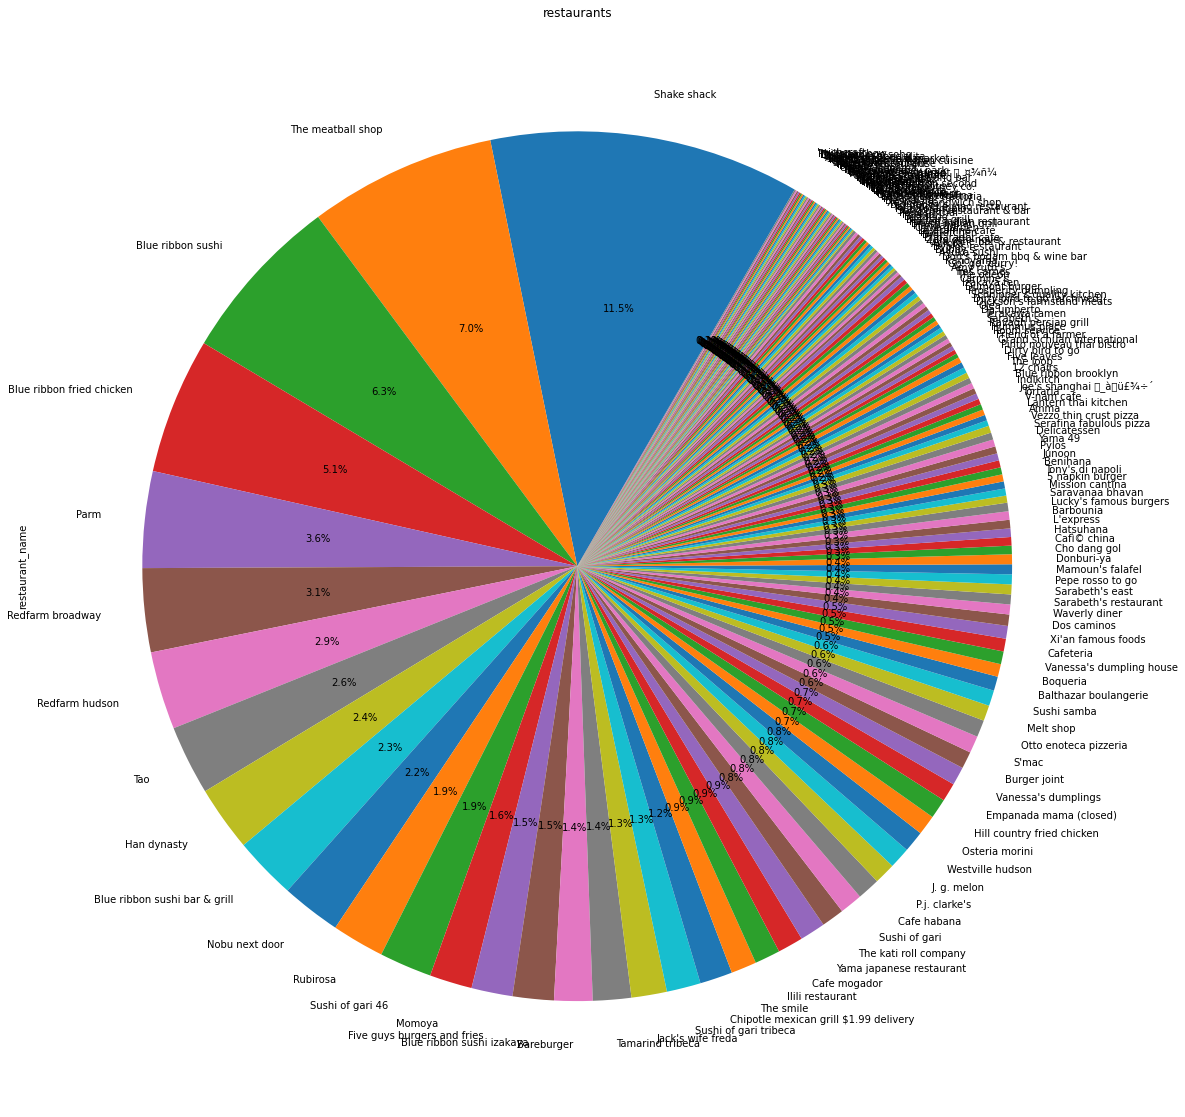

In [25]:
plt.figure(figsize=(20,20))
explode=(0.1,0.05,0.05)
df['restaurant_name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('restaurants')

Text(0.5, 1.0, 'cuisine types')

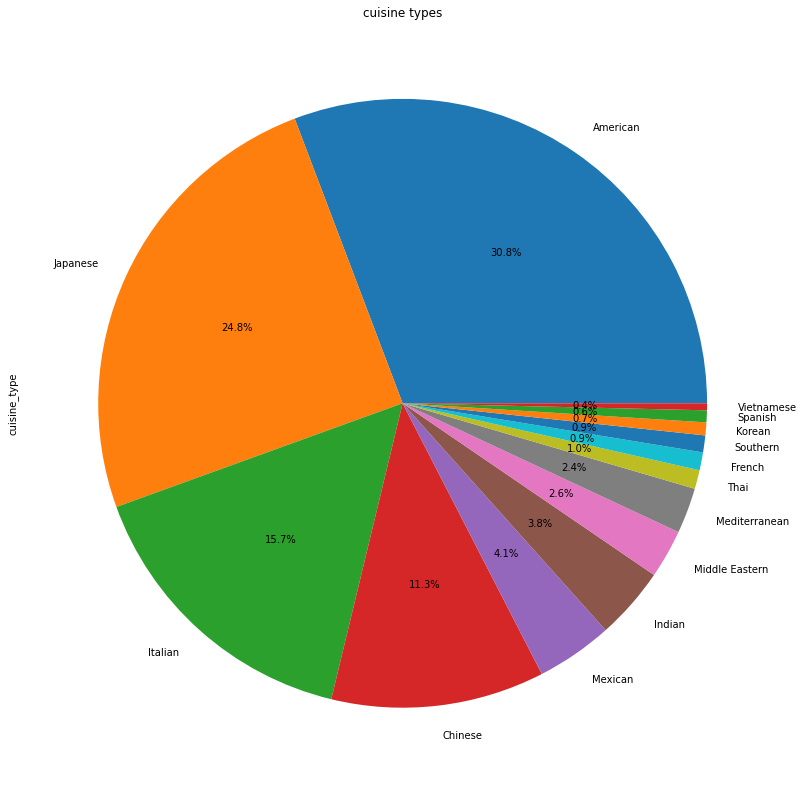

In [33]:
plt.figure(figsize=(14,14))
explode=[0.1,0,0] #en büyük dilimi ayırmak için
df['cuisine_type'].value_counts().plot.pie(autopct='%1.1f%%') 
#yüzdeleri dilimlerin içine yazdırmak için(autopct='%1.1f%%')
plt.title('cuisine types')

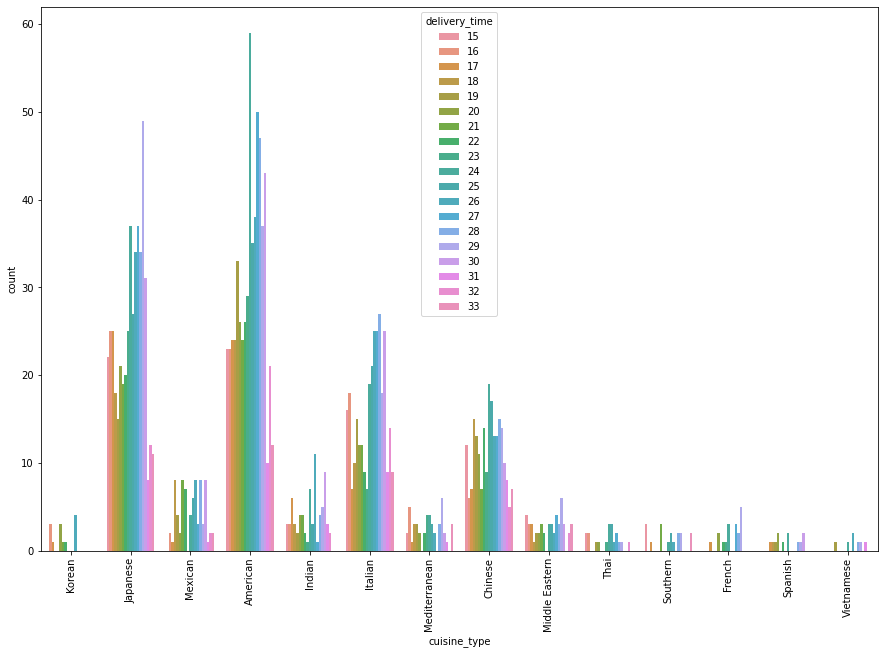

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(df['cuisine_type'],hue=df['delivery_time'])#hangi ürünler en çok satılmış gösterir#hue=df.Genderhangirenk hangi cinsiyet olduğunu gösterir.
plt.xticks(rotation=90);

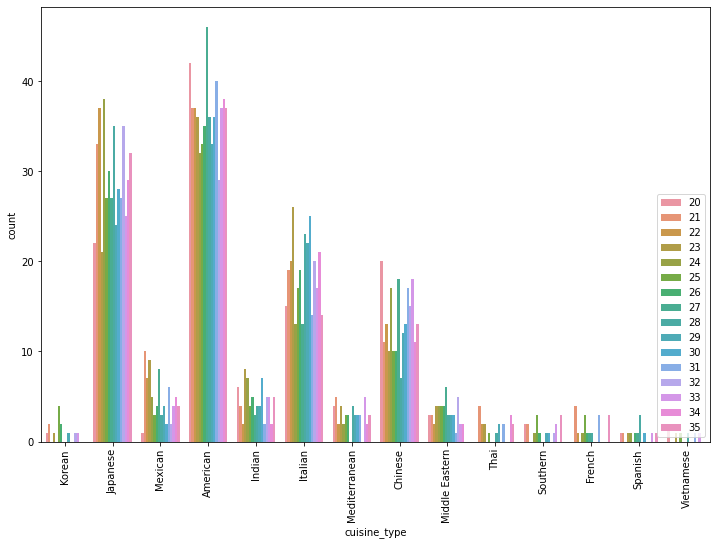

In [41]:
plt.figure(figsize=(12,8))
sns.countplot(df['cuisine_type'],hue=df['food_preparation_time'])#hangi ürünler en çok satılmış gösterir
plt.xticks(rotation=90);
plt.legend(loc=4) #renklerin ne anlama geldiğini belirten kutucuğun grafik üzerine konumunu belirliyor (loc=0-10)

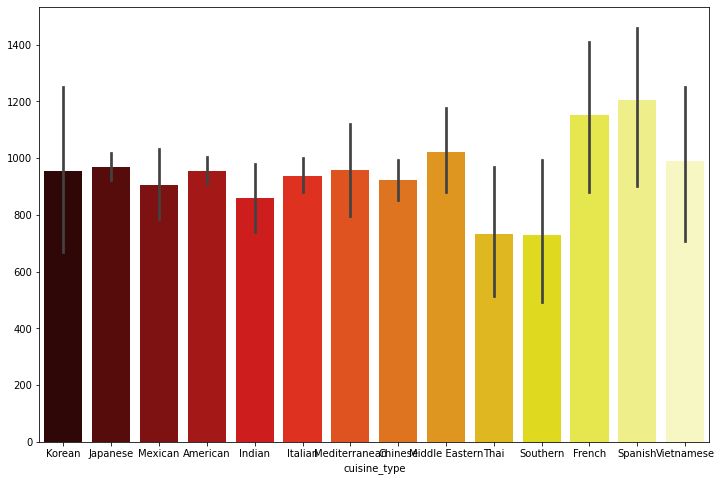

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['cuisine_type'],y=df.index,palette='hot'); 

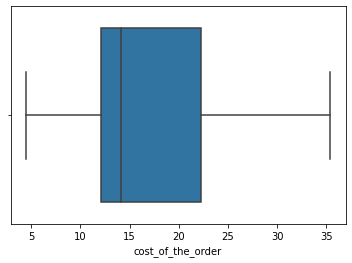

In [45]:
sns.boxplot(x=df['cost_of_the_order'])

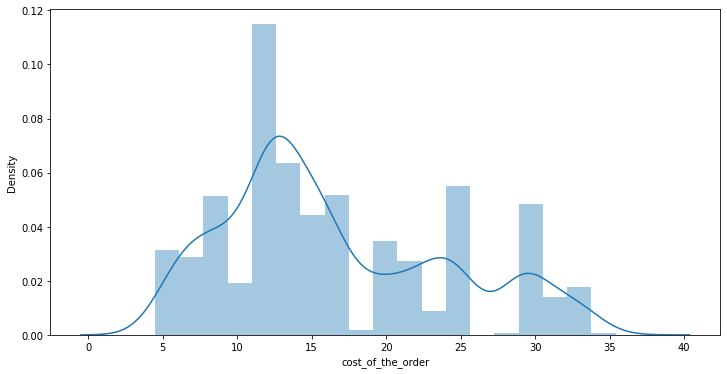

In [48]:
plt.figure(figsize=(12,6))
sns.distplot(df['cost_of_the_order']); #dağılımına bakmak için #satış

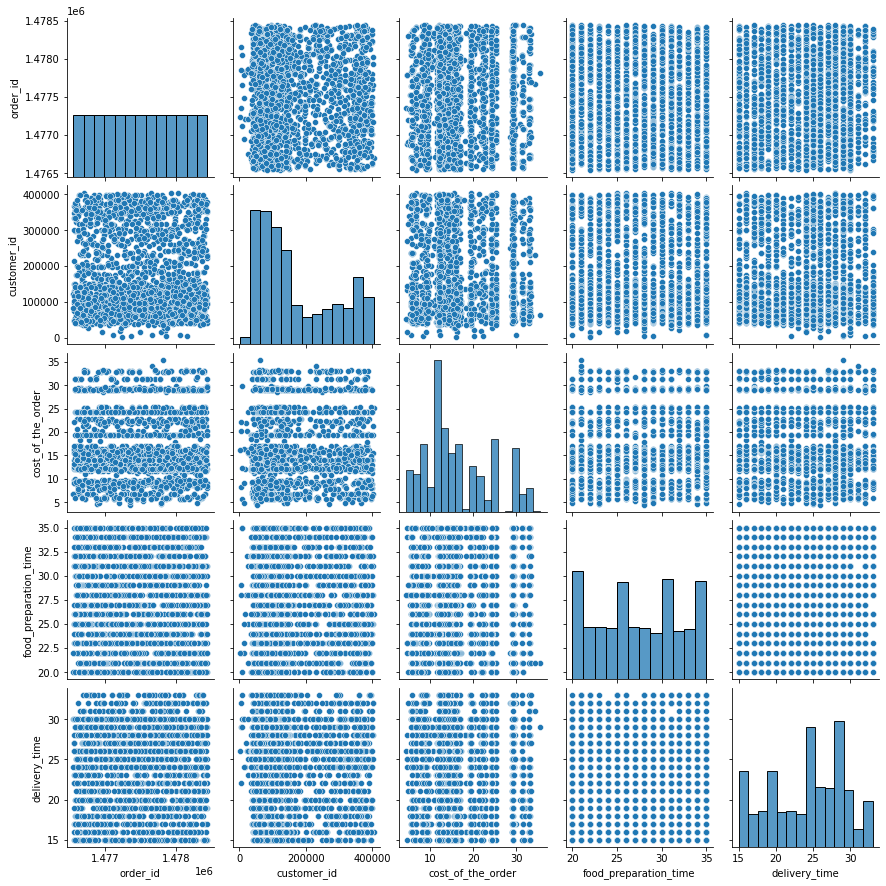

In [49]:
sns.pairplot(df)

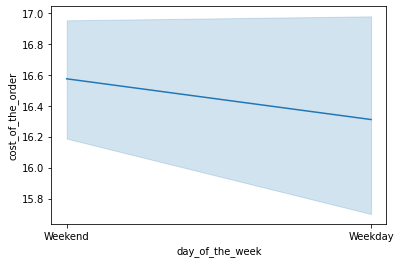

In [51]:
sns.lineplot(x="day_of_the_week", y='cost_of_the_order',data=df)